# Transfer Learning

## Model Scaling

1. Pretraining EfficientNetB0 (10% of Dataset with 10 Classes)
2. Fine-Tuning (100% of Dataset with 10 Classes)
3. Scaling the Model to all 101 Classes (10% of Dataset with 101 Classes)

In [1]:
import datetime
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

2023-03-16 13:13:16.060765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# export helper functions from above into helper script
from helper import (create_tensorboard_callback,
                    create_checkpoint_callback,
                    plot_accuracy_curves,
                    combine_training_curves,
                    data_augmentation_layer_no_rescaling)

2023-03-16 13:13:17.922375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 13:13:17.940991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 13:13:17.941169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 13:13:17.941563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow w

In [3]:
# global variables
SEED = 42
BATCH_SIZE = 32
IMG_SHAPE = (224, 224)

### Get Data

In [4]:
# preparing datasets
# wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

training_directory = "../datasets/101_food_classes_10_percent/train"
testing_directory = "../datasets/101_food_classes_10_percent/test"

training_data_101_10 = image_dataset_from_directory(training_directory,
                                              labels='inferred',
                                              label_mode='categorical',
                                              seed=SEED,
                                              shuffle=True,
                                              image_size=IMG_SHAPE,
                                              batch_size=BATCH_SIZE)

testing_data_101_10 = image_dataset_from_directory(testing_directory,
                                              labels='inferred',
                                              label_mode='categorical',
                                              seed=SEED,
                                              shuffle=False,
                                              image_size=IMG_SHAPE,
                                              batch_size=BATCH_SIZE)

# get class names
class_names_101_10 = training_data_101_10.class_names
len(class_names_101_10), class_names_101_10

# Found 7575 files belonging to 101 classes.
# Found 25250 files belonging to 101 classes.

# (101,
#  ['apple_pie',
#   'baby_back_ribs',
#   'baklava',
#   'beef_carpaccio',
#   'beef_tartare',
#   'beet_salad',
#   'beignets',
#   'bibimbap',
#   'bread_pudding',
#   'breakfast_burrito',
#   'bruschetta',
#   'caesar_salad',
#   'cannoli',
#   'caprese_salad',
#   'carrot_cake',
#   'ceviche',
#   'cheese_plate',
#   'cheesecake',
#   'chicken_curry',
#   'chicken_quesadilla',
#   'chicken_wings',
#   'chocolate_cake',
#   'chocolate_mousse',
#   'churros',
#   'clam_chowder',
#   'club_sandwich',
#   'crab_cakes',
#   'creme_brulee',
#   'croque_madame',
#   'cup_cakes',
#   'deviled_eggs',
#   'donuts',
#   'dumplings',
#   'edamame',
#   'eggs_benedict',
#   'escargots',
#   'falafel',
#   'filet_mignon',
#   'fish_and_chips',
#   'foie_gras',
#   'french_fries',
#   'french_onion_soup',
#   'french_toast',
#   'fried_calamari',
#   'fried_rice',
#   'frozen_yogurt',
#   'garlic_bread',
#   'gnocchi',
#   'greek_salad',
#   'grilled_cheese_sandwich',
#   'grilled_salmon',
#   'guacamole',
#   'gyoza',
#   'hamburger',
#   'hot_and_sour_soup',
#   'hot_dog',
#   'huevos_rancheros',
#   'hummus',
#   'ice_cream',
#   'lasagna',
#   'lobster_bisque',
#   'lobster_roll_sandwich',
#   'macaroni_and_cheese',
#   'macarons',
#   'miso_soup',
#   'mussels',
#   'nachos',
#   'omelette',
#   'onion_rings',
#   'oysters',
#   'pad_thai',
#   'paella',
#   'pancakes',
#   'panna_cotta',
#   'peking_duck',
#   'pho',
#   'pizza',
#   'pork_chop',
#   'poutine',
#   'prime_rib',
#   'pulled_pork_sandwich',
#   'ramen',
#   'ravioli',
#   'red_velvet_cake',
#   'risotto',
#   'samosa',
#   'sashimi',
#   'scallops',
#   'seaweed_salad',
#   'shrimp_and_grits',
#   'spaghetti_bolognese',
#   'spaghetti_carbonara',
#   'spring_rolls',
#   'steak',
#   'strawberry_shortcake',
#   'sushi',
#   'tacos',
#   'takoyaki',
#   'tiramisu',
#   'tuna_tartare',
#   'waffles'])

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


(101,
 ['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  

### Model Building and Training

In [5]:
# create callbacks from helper.py
## checkpoint callback
checkpoint_callback = create_checkpoint_callback(
    dir_name='../checkpoints/transfer_learning_scaling',
    experiment_name='101_classes_10_percent_dataset')

## tensorboard callback
tensorboard_callback = create_tensorboard_callback(
    dir_name='../tensorboard/transfer_learning_scaling',
    experiment_name='101_classes_10_percent_dataset')

INFO :: Saving Checkpoint to: ../checkpoints/transfer_learning_scaling/101_classes_10_percent_dataset
INFO :: Saving TensorBoard Log to: ../tensorboard/transfer_learning_scaling/101_classes_10_percent_dataset/20230316-131335


In [6]:
# get base model from keras applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False
)
base_model.trainable = False

# build model using keras functional API
input_layer = tf.keras.layers.Input(shape=IMG_SHAPE+(3,), name='input_layer')
# use image augmentation layer from helper.py
data = data_augmentation_layer_no_rescaling(input_layer)
# run in inference mode so batchnorm statistics don't get updated
# even after unfreezing the base model for fine-tuning
data = base_model(data, training=False)
data = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(data)
output_layer = tf.keras.layers.Dense(len(class_names_101_10), activation="softmax", name="output_layer")(data)

model = tf.keras.Model(input_layer, output_layer)

# compile the model
model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [7]:
# fit the model
## training epochs before fine-tuning
pretraining_epochs = 5

history_model = model.fit(
                training_data_101_10,
                epochs=pretraining_epochs,
                steps_per_epoch=len(training_data_101_10),
                validation_data=testing_data_101_10,
                # evaluate performance on 15% of the testing dataset
                validation_steps=int(0.15 * len(testing_data_101_10)),
                callbacks=[tensorboard_callback,
                           checkpoint_callback])

# Epoch 5/5
# 72s 303ms/step - loss: 1.5599 - accuracy: 0.6182 - val_loss: 1.8425 - val_accuracy: 0.5278

Epoch 1/5


2023-03-16 13:14:04.825106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-03-16 13:14:06.499357: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f66aafce0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-16 13:14:06.499406: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-03-16 13:14:06.503227: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-16 13:14:06.503531: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-03-16 13:14:06.595844: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most o

237/237 [==============================] - 86s 320ms/step - loss: 3.4441 - accuracy: 0.2679 - val_loss: 2.7113 - val_accuracy: 0.4044
Epoch 2/5
237/237 [==============================] - 73s 306ms/step - loss: 2.3199 - accuracy: 0.4679 - val_loss: 2.1862 - val_accuracy: 0.4852
Epoch 3/5
237/237 [==============================] - 72s 305ms/step - loss: 1.9406 - accuracy: 0.5409 - val_loss: 1.9638 - val_accuracy: 0.5225
Epoch 4/5
237/237 [==============================] - 73s 308ms/step - loss: 1.7045 - accuracy: 0.5875 - val_loss: 1.8448 - val_accuracy: 0.5323
Epoch 5/5
237/237 [==============================] - 72s 303ms/step - loss: 1.5599 - accuracy: 0.6182 - val_loss: 1.8425 - val_accuracy: 0.5278


In [8]:
# evaluate performance on whole dataset
pre_training_results = model.evaluate(testing_data_101_10)
print(pre_training_results)

# [1.584436297416687, 0.5826930403709412]

790/790 [==============================] - 155s 196ms/step - loss: 1.5844 - accuracy: 0.5827
[1.584436297416687, 0.5826930403709412]


### Fine-tuning the Model

In [15]:
# unfreeze entire model
base_model.trainable = True

# keep only the last 5 layers trainable
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [16]:
# list all layers in model
for layer in model.layers:
    print(layer, layer.trainable)
    
# <keras.engine.input_layer.InputLayer object at 0x7f695c39b370> True
# <keras.engine.sequential.Sequential object at 0x7f695c39a260> True
# <keras.engine.functional.Functional object at 0x7f6943f0d300> True
# <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f6943f4e830> True
# <keras.layers.core.dense.Dense object at 0x7f69400c0520> True
    
# layer 2 is the now only partly unfrozen imported model (efficientnetb0)
for layer_number, layer in enumerate(model.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)
    
# 0 input_1 False
# 1 rescaling False
# 2 normalization False
# ...
# 262 block6h_se_excite False
# 263 block6h_project_conv False
# 264 block6h_project_bn False
# 265 block6h_drop True
# 266 block6h_add True
# 267 top_conv True
# 268 top_bn True
# 269 top_activation True

<keras.engine.input_layer.InputLayer object at 0x7f695c39b370> True
<keras.engine.sequential.Sequential object at 0x7f695c39a260> True
<keras.engine.functional.Functional object at 0x7f6943f0d300> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f6943f4e830> True
<keras.layers.core.dense.Dense object at 0x7f69400c0520> True
0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False

In [17]:
# recompile the model with the new basemodel
### to prevent overfitting / to better hold on to pre-training
### the learning rate during fine-tuning should be lowered 10x
### default Adam(lr)=1e-3 => 1e-4
model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
               metrics=['accuracy'])

In [18]:
# continue training
fine_tuning_epochs = pretraining_epochs + 5

history_fine_tuning_model = model.fit(
                training_data_101_10,
                epochs=fine_tuning_epochs,
                # start from last pre-training checkpoint
                # training from epoch 6 - 10
                initial_epoch = history_model.epoch[-1],
                steps_per_epoch=len(training_data_101_10),
                validation_data=testing_data_101_10,
                # evaluate performance on 15% of the testing dataset
                validation_steps=int(0.15 * len(testing_data_101_10)),
                callbacks=[tensorboard_callback,
                           checkpoint_callback])

# Epoch 10/10
# 68s 287ms/step - loss: 1.0435 - accuracy: 0.7269 - val_loss: 1.6981 - val_accuracy: 0.5596

Epoch 5/10
237/237 [==============================] - 84s 317ms/step - loss: 1.3510 - accuracy: 0.6547 - val_loss: 1.7404 - val_accuracy: 0.5437
Epoch 6/10
237/237 [==============================] - 75s 316ms/step - loss: 1.2424 - accuracy: 0.6754 - val_loss: 1.7269 - val_accuracy: 0.5493
Epoch 7/10
237/237 [==============================] - 70s 296ms/step - loss: 1.1849 - accuracy: 0.6879 - val_loss: 1.7145 - val_accuracy: 0.5522
Epoch 8/10
237/237 [==============================] - 69s 291ms/step - loss: 1.1359 - accuracy: 0.7020 - val_loss: 1.7129 - val_accuracy: 0.5540
Epoch 9/10
237/237 [==============================] - 70s 294ms/step - loss: 1.0899 - accuracy: 0.7137 - val_loss: 1.7006 - val_accuracy: 0.5599
Epoch 10/10
237/237 [==============================] - 68s 287ms/step - loss: 1.0435 - accuracy: 0.7269 - val_loss: 1.6981 - val_accuracy: 0.5596


In [21]:
# evaluate performance on whole dataset
fine_tuning_results = model.evaluate(testing_data_101_10)
print(fine_tuning_results)

# pre_training_results
# [1.584436297416687, 0.5826930403709412]

# fine_tuning_results
# [1.4517788887023926, 0.6104554533958435]

790/790 [==============================] - 61s 77ms/step - loss: 1.4518 - accuracy: 0.6105
[1.4517788887023926, 0.6104554533958435]


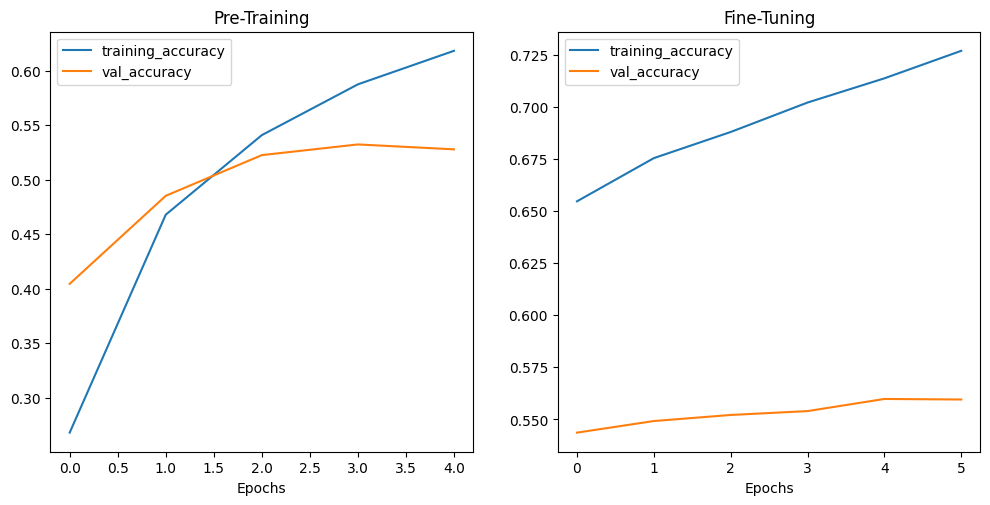

In [19]:
# print accuracy curves
plot_accuracy_curves(history_model, "Pre-Training", history_fine_tuning_model, "Fine-Tuning")

![Transfer Learning](../assets/04_Tensorflow_Transfer_Learning_13.png)

5
11
[0.267854779958725, 0.4678547978401184, 0.5408580899238586, 0.5874587297439575, 0.6182178258895874, 0.6546534895896912, 0.6753795146942139, 0.6879208087921143, 0.7020462155342102, 0.7136633396148682, 0.7268646955490112]


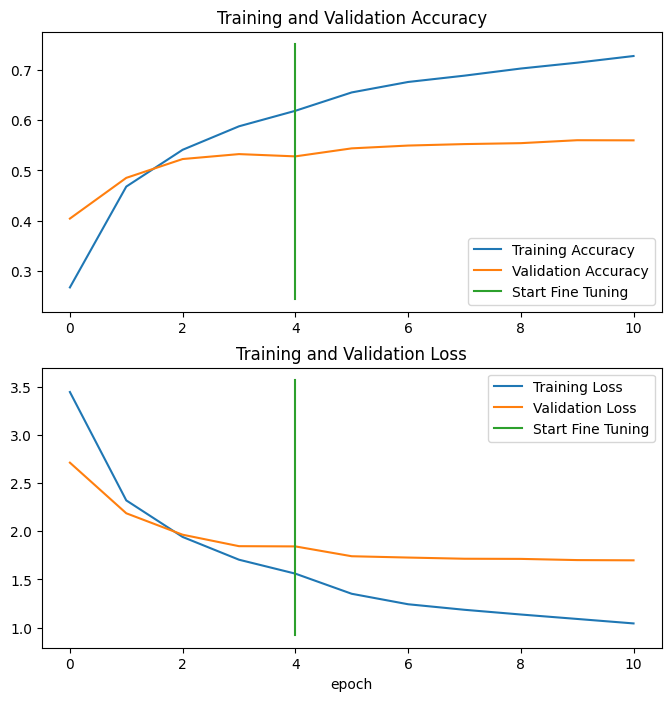

In [20]:
# the validation accuracy increase keeps slowing while training
# accuracy goes up this points to an overfitting problem
combine_training_curves(history_model, history_fine_tuning_model, pretraining_epochs=5)

![Transfer Learning](../assets/04_Tensorflow_Transfer_Learning_14.png)

In [ ]:
009 Saving and loading our trained model.mp4